/tmp/slurm-sarim.hashmi-35556/ipykernel_625927/565081454.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(CHECKPOINT_PATH, map_location=DEVICE)


Model loaded successfully.
Image preprocessed.
Prediction generated.


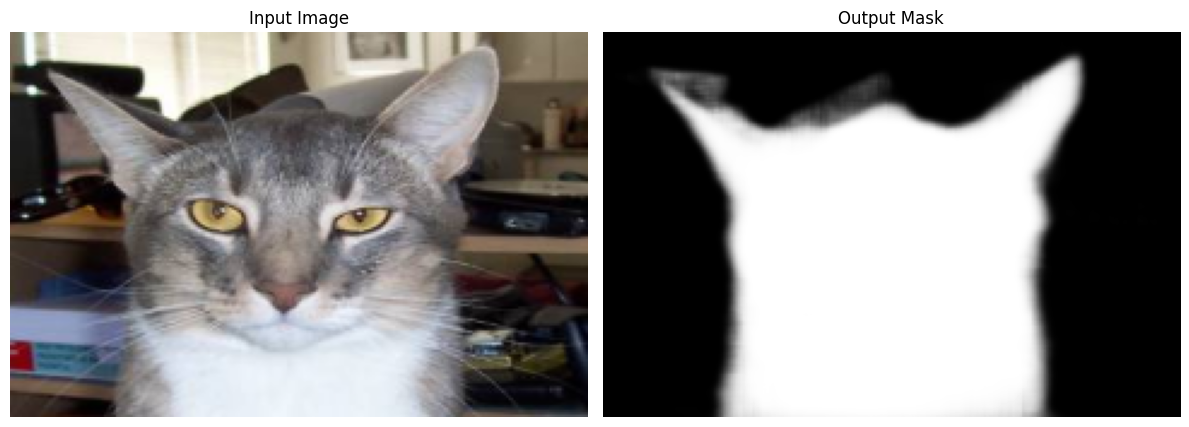

In [3]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
from model import UNET  # Make sure this import works with your file structure
import albumentations as A
from albumentations.pytorch import ToTensorV2
import numpy as np

# Constants
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
IMAGE_HEIGHT = 160
IMAGE_WIDTH = 240
CHECKPOINT_PATH = "my_checkpoint.pth.tar"  # Update this path to your saved model
INPUT_IMAGE_PATH = "/home/sarim.hashmi/Downloads/unet_from_scratch/dataset/images/Abyssinian_221.jpg"  # Update this to your input image path

def load_model():
    model = UNET(in_channels=3, out_channels=1).to(DEVICE)
    checkpoint = torch.load(CHECKPOINT_PATH, map_location=DEVICE)
    model.load_state_dict(checkpoint["state_dict"])
    model.eval()
    return model

def preprocess_image(image_path):
    transform = A.Compose([
        A.Resize(height=IMAGE_HEIGHT, width=IMAGE_WIDTH),
        A.Normalize(
            mean=[0.0, 0.0, 0.0],
            std=[1.0, 1.0, 1.0],
            max_pixel_value=255.0,
        ),
        ToTensorV2(),
    ])
    
    image = Image.open(image_path).convert("RGB")
    image_np = np.array(image)
    transformed = transform(image=image_np)
    return transformed["image"].unsqueeze(0).to(DEVICE)

def visualize_results(input_image, output_mask):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Display input image
    ax1.imshow(input_image.permute(1, 2, 0).cpu().numpy())
    ax1.set_title("Input Image")
    ax1.axis('off')
    
    # Display output mask
    ax2.imshow(output_mask.squeeze().cpu().numpy(), cmap='gray')
    ax2.set_title("Output Mask")
    ax2.axis('off')
    
    plt.tight_layout()
    plt.show()

def main():
    # Load the model
    model = load_model()
    print("Model loaded successfully.")

    # Preprocess the input image
    input_tensor = preprocess_image(INPUT_IMAGE_PATH)
    print("Image preprocessed.")

    # Generate prediction
    with torch.no_grad():
        output = model(input_tensor)
    output = torch.sigmoid(output)
    print("Prediction generated.")

    # Visualize results
    visualize_results(input_tensor.squeeze(), output.squeeze())

if __name__ == "__main__":
    main()